In [1]:
# Imports for project
#Current MO, copy a project and see if it works just for funsies

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as pylab

from skimage.io import imread
from skimage.color import rgb2gray
from skimage import measure, morphology
from skimage.measure import regionprops
#from skimage.filters import threshold_otsu
#from skimage.morphology import square, binary_opening

In [20]:
import cv2
import numpy as np

def extract_signature(image_path, output_path):
    # Step 1: Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Step 2: Preprocessing
    img_blur = cv2.medianBlur(img, 5) # Applying median blur
    img_contrast = cv2.equalizeHist(img_blur) # Enhancing contrast
    
    # Step 3: Thresholding
    _, img_thresh = cv2.threshold(img_contrast, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    # Step 4: Contour Detection
    contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Check if any contours were found
    if len(contours) == 0:
        print("No contours found. Unable to extract signature.")
        return
    
    contour_areas = [cv2.contourArea(c) for c in contours]
    max_contour_index = np.argmax(contour_areas)
    signature_contour = contours[max_contour_index]
    
    # Step 5: Bounding Box
    x, y, w, h = cv2.boundingRect(signature_contour)
    bounding_box = cv2.rectangle(img.copy(), (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Step 6: Extracting the Signature
    extracted_signature = img[y:y+h, x:x+w]
    
    # Step 8: Output
    cv2.imwrite(output_path, extracted_signature)






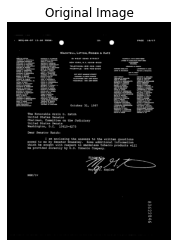

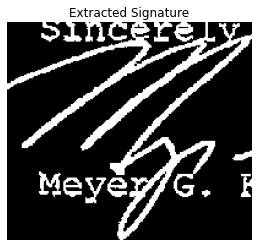

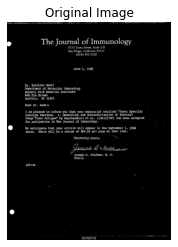

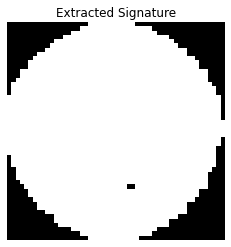

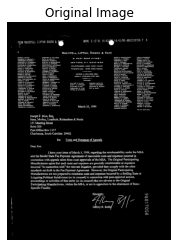

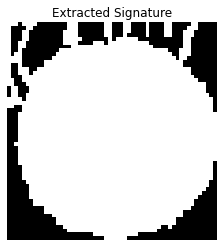

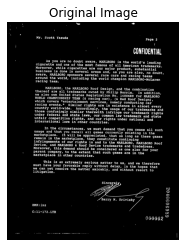

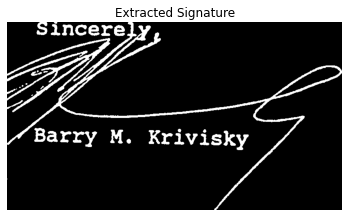

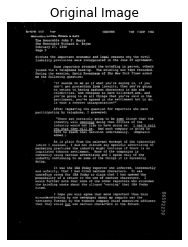

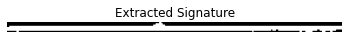

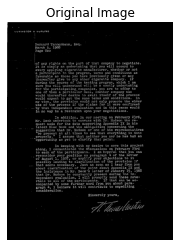

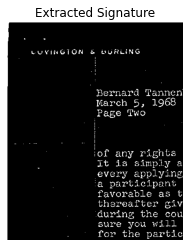

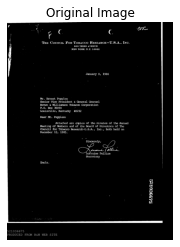

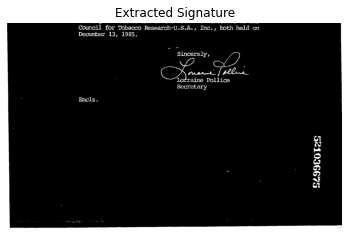

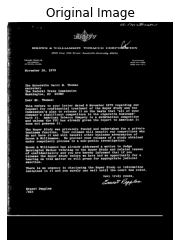

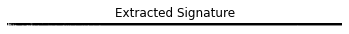

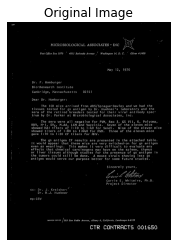

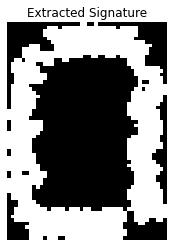

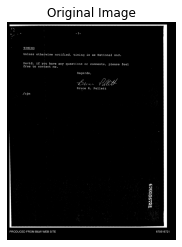

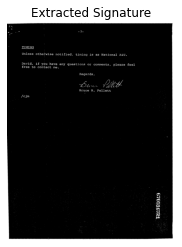

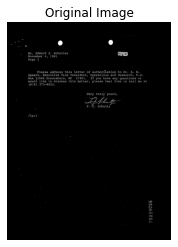

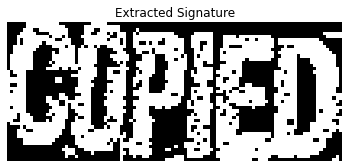

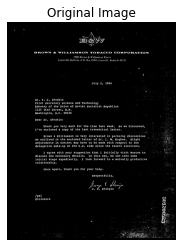

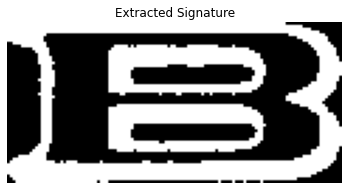

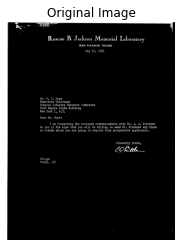

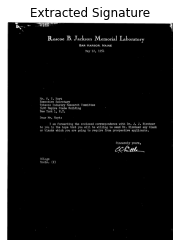

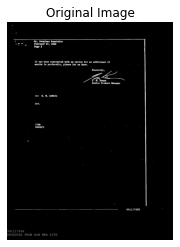

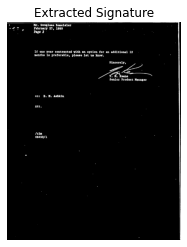

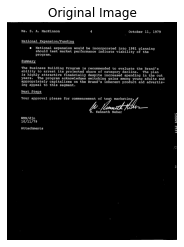

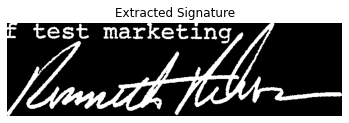

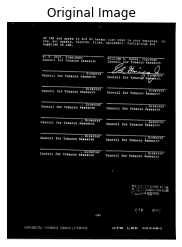

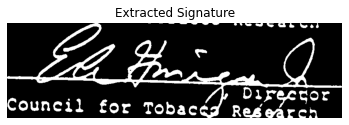

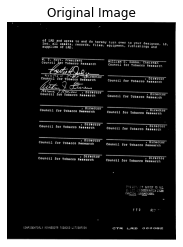

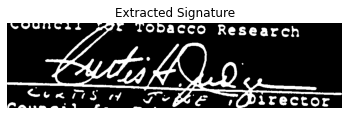

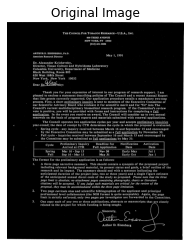

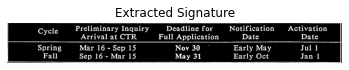

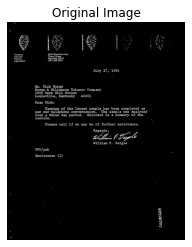

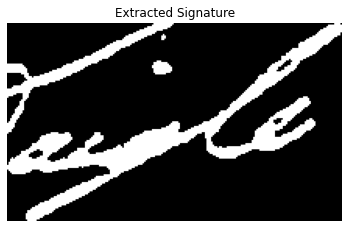

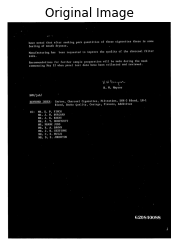

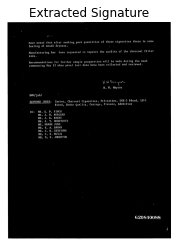

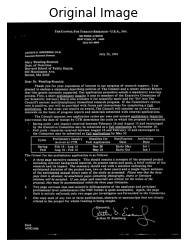

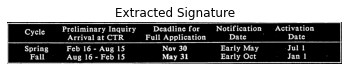

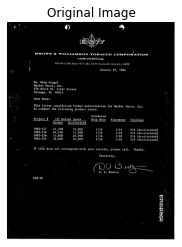

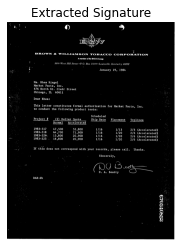

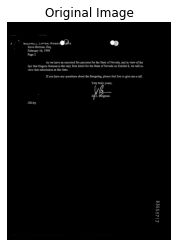

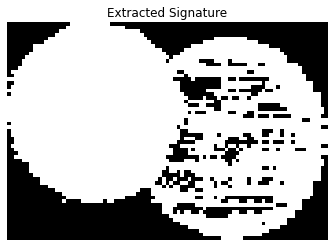

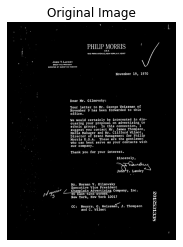

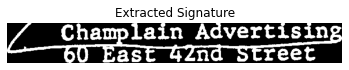

In [22]:
directory = "Dataset_Sig"

# Loop through all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".png") or filename.endswith(".jpg"):  # Adjust file extensions as needed
        # Path to the current image file
        image_path = os.path.join(directory, filename)
        
        # Define the output path for the extracted signature
        output_path = os.path.join(directory, f"{os.path.splitext(filename)[0]}_signature.png")
        
        # Call the function to extract signature
        extract_signature(image_path, output_path)

        # Load the original image
        original_img = cv2.imread(image_path)

        # Check if the original image exists
        if original_img is not None:
            # Display the original image
            plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
            plt.title('Original Image')
            plt.axis('off')
            plt.show()
        else:
            print(f"Error: Unable to load the original image: {image_path}")

        # Check if the extracted signature image exists
        if os.path.exists(output_path):
            # Load the extracted signature
            extracted_signature_img = cv2.imread(output_path)

            # Display the extracted signature
            plt.imshow(cv2.cvtColor(extracted_signature_img, cv2.COLOR_BGR2RGB))
            plt.title('Extracted Signature')
            plt.axis('off')
            plt.show()
        else:
            print("Error: Extracted signature image not found.")

    else:
        continue
